In [ ]:
# 建立一个sequential 顺序模型
from keras.models import Sequential
model = Sequential()

In [ ]:
# 通过add 增加各层网络
from keras.layers import Dense
model.add(Dense(units=3, activation='sigmoid', input_dim=3))
model.add(Dense(units=1, activation = 'sigmoid'))
model.summary

In [ ]:
# 通过compile配置模型求解过程参数
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [88]:
# laod the data
import pandas as pd
import numpy as np
data = pd.read_csv('data_MLP.csv')

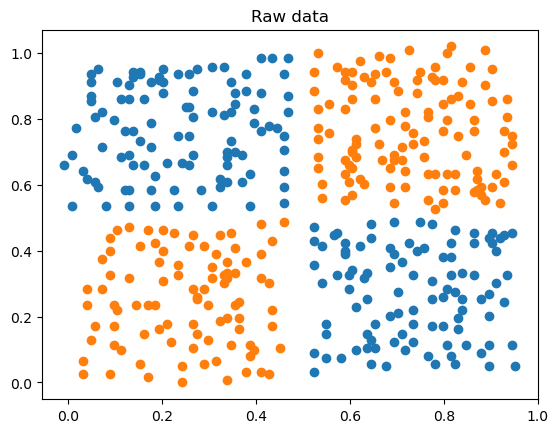

In [89]:
# visulize the data
x = data.drop(['y'],axis=1)
x1 =  x.loc[:,'x1']
x2 = x.loc[:,'x2']
y = data.loc[:,'y']
from matplotlib import pyplot as plt
fig1 = plt.figure()
cata1 = plt.scatter(x1[y==0],x2[y==0])
cata2 = plt.scatter(x1[y==1],x2[y==1])
plt.title('Raw data')
plt.show()

In [90]:
# split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=10)
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
print(type(x_test),type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [91]:
# set the model
from keras.models import Sequential
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(units=20, input_dim=2, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                60        
                                                                 
 dense_13 (Dense)            (None, 1)                 21        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [92]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
#train the model
model.fit(x_train,y_train, epochs=5000)

Epoch 1/5000
9/9 [==============================] - 1s 3ms/step - loss: 0.8497
Epoch 2/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.8210
Epoch 3/5000
9/9 [==============================] - 0s 2ms/step - loss: 0.7955
Epoch 4/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7736
Epoch 5/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7553
Epoch 6/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7417
Epoch 7/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7294
Epoch 8/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7190
Epoch 9/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7132
Epoch 10/5000
9/9 [==============================] - 0s 3ms/step - loss: 0.7069
Epoch 11/5000
9/9 [==============================] - 0s 2ms/step - loss: 0.7029
Epoch 12/5000
9/9 [==============================] - 0s 2ms/step - loss: 0.7001
Epoch 13/5000
9/9 [==============================

In [ ]:
# make prediction and calcuate the accuracy
y_train_predict = (model.predict(x_train)>0.5).astype('int32')
from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(y_train,y_train_predict)
y_test_predict =(model.predict(x_test)>0.5).astype('int32')
accuracy_test = accuracy_score(y_test,y_test_predict)
print(accuracy_train,accuracy_test)

In [ ]:
# visulize the data 
print(type(y_train_predict))
y_train_predict_form = pd.Series(i[0] for i in y_train_predict)
print(y_train_predict_form)

In [ ]:
# visulize the data
xx, yy = np.meshgrid(np.arange(0,1,0.01),np.arange(0,1,0.01))
x_range = np.c_[xx.ravel(),yy.ravel()]
y_range_predict = (model.predict(x_range)>0.5).astype('int32')
y_range_predict_form = pd.Series(i[0] for i in y_range_predict)
print(x_range)

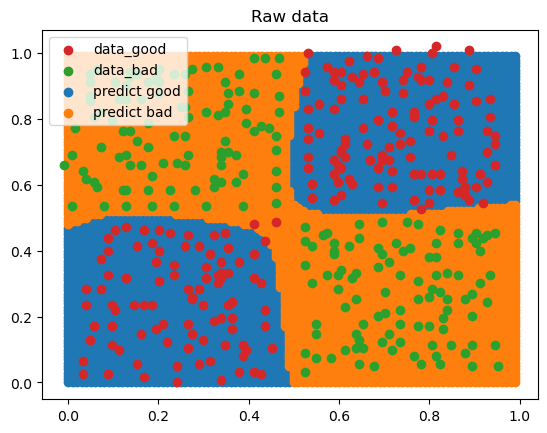

In [98]:
# visualize the data
fig2 = plt.figure()
predict_good = plt.scatter(x_range[:,0][y_range_predict_form==1], x_range[:,1][y_range_predict_form==1])
predict_bad = plt.scatter(x_range[:,0][y_range_predict_form==0], x_range[:,1][y_range_predict_form==0])
data_bad = plt.scatter(x1[y==0],x2[y==0])
data_good = plt.scatter(x1[y==1],x2[y==1])
plt.title('Raw data')
plt.legend((data_good,data_bad,predict_good,predict_bad),('data_good','data_bad','predict good','predict bad'))
plt.show()